<a href="https://colab.research.google.com/github/TejasOhlan/Diabetes-Prediction/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

#OSEMN Pipeline
* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - Interpreting our data

## Load and review data

In [ ]:
pdata = pd.read_csv("pima-indians-diabetes.csv")

In [ ]:
pdata.shape # Check number of columns and rows in data frame

(768, 9)

In [ ]:
pdata.head() # To check first 5 rows of data set

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Preg - No. of times pregnant <br>
Plas - Plasma Glucode concentration (oral glucoce tolerance test<br>
Pres - Diastolic Blood Pressure (lower one) <br>
Skin - Skin Thickness<br>
Test - Insulin ( 2 hour serum insulin) <br>
Mass - BMI<br>
Pedi - Diabetes Pedigree Function (Likelyhood of diabetes based on family history ) <br>
Age - age<br>
Class - Target Varaible ... Outcome ( 0 OR 1 )

In [ ]:
pdata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
pdata_copy = pdata.copy()
pdata_copy[['Plas','Pres','skin','test','mass','age']] = pdata_copy[['Plas','Pres','skin','test','mass','age']].replace(0,np.nan)
print(pdata_copy.isnull().sum())

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64


A value of zero in these columns does not make any sense

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f840b40a650>,
      dtype=object)

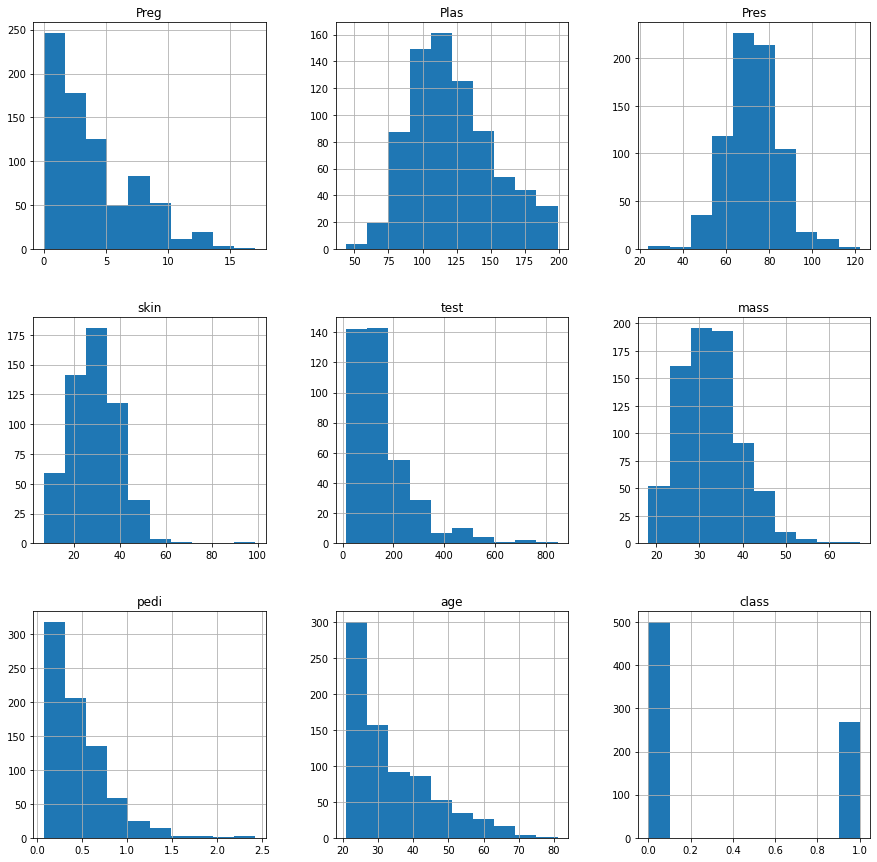

In [ ]:
pdata_copy.hist(figsize = (15,15))

In [ ]:
pdata_copy['Plas'].fillna(pdata_copy['Plas'].median(), inplace = True)
pdata_copy['Pres'].fillna(pdata_copy['Pres'].median(), inplace = True)
pdata_copy['skin'].fillna(pdata_copy['skin'].median(), inplace = True)
pdata_copy['test'].fillna(pdata_copy['test'].median(), inplace = True)
pdata_copy['mass'].fillna(pdata_copy['mass'].median(), inplace = True)

Plotting after replacing nan values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f840af3a090>,
      dtype=object)

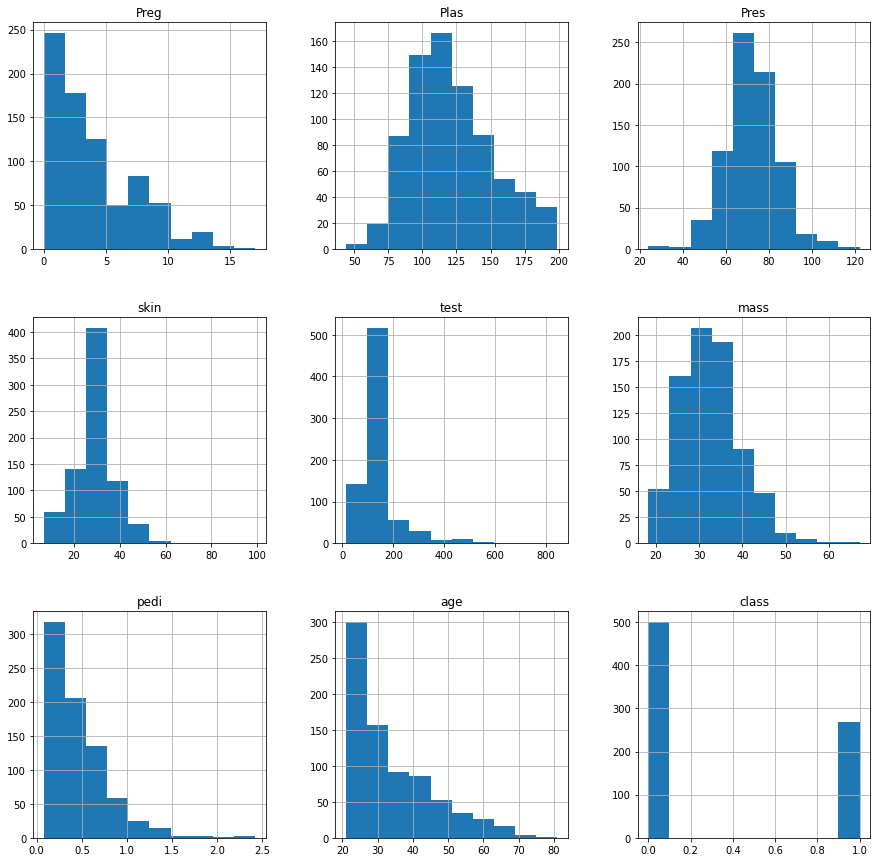

In [ ]:
pdata_copy.hist(figsize = (15,15))

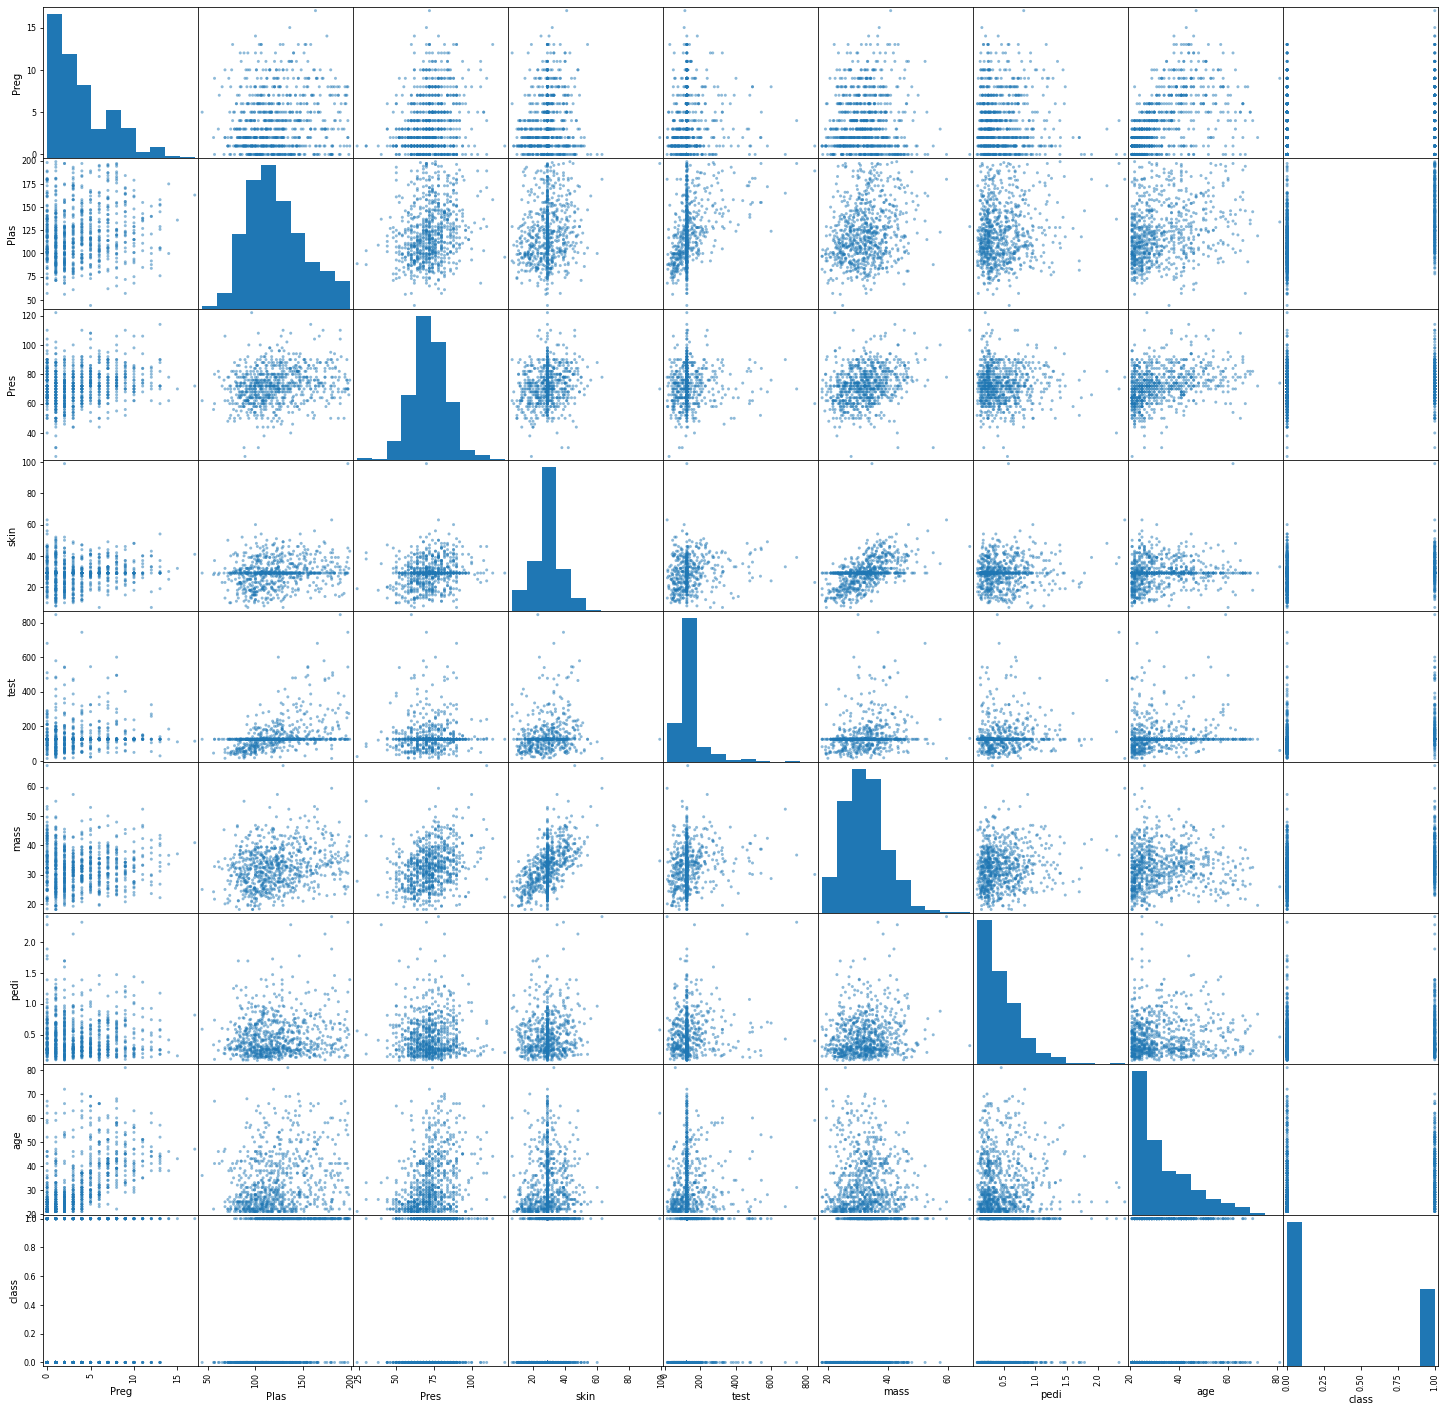

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(pdata_copy,figsize=(25, 25))

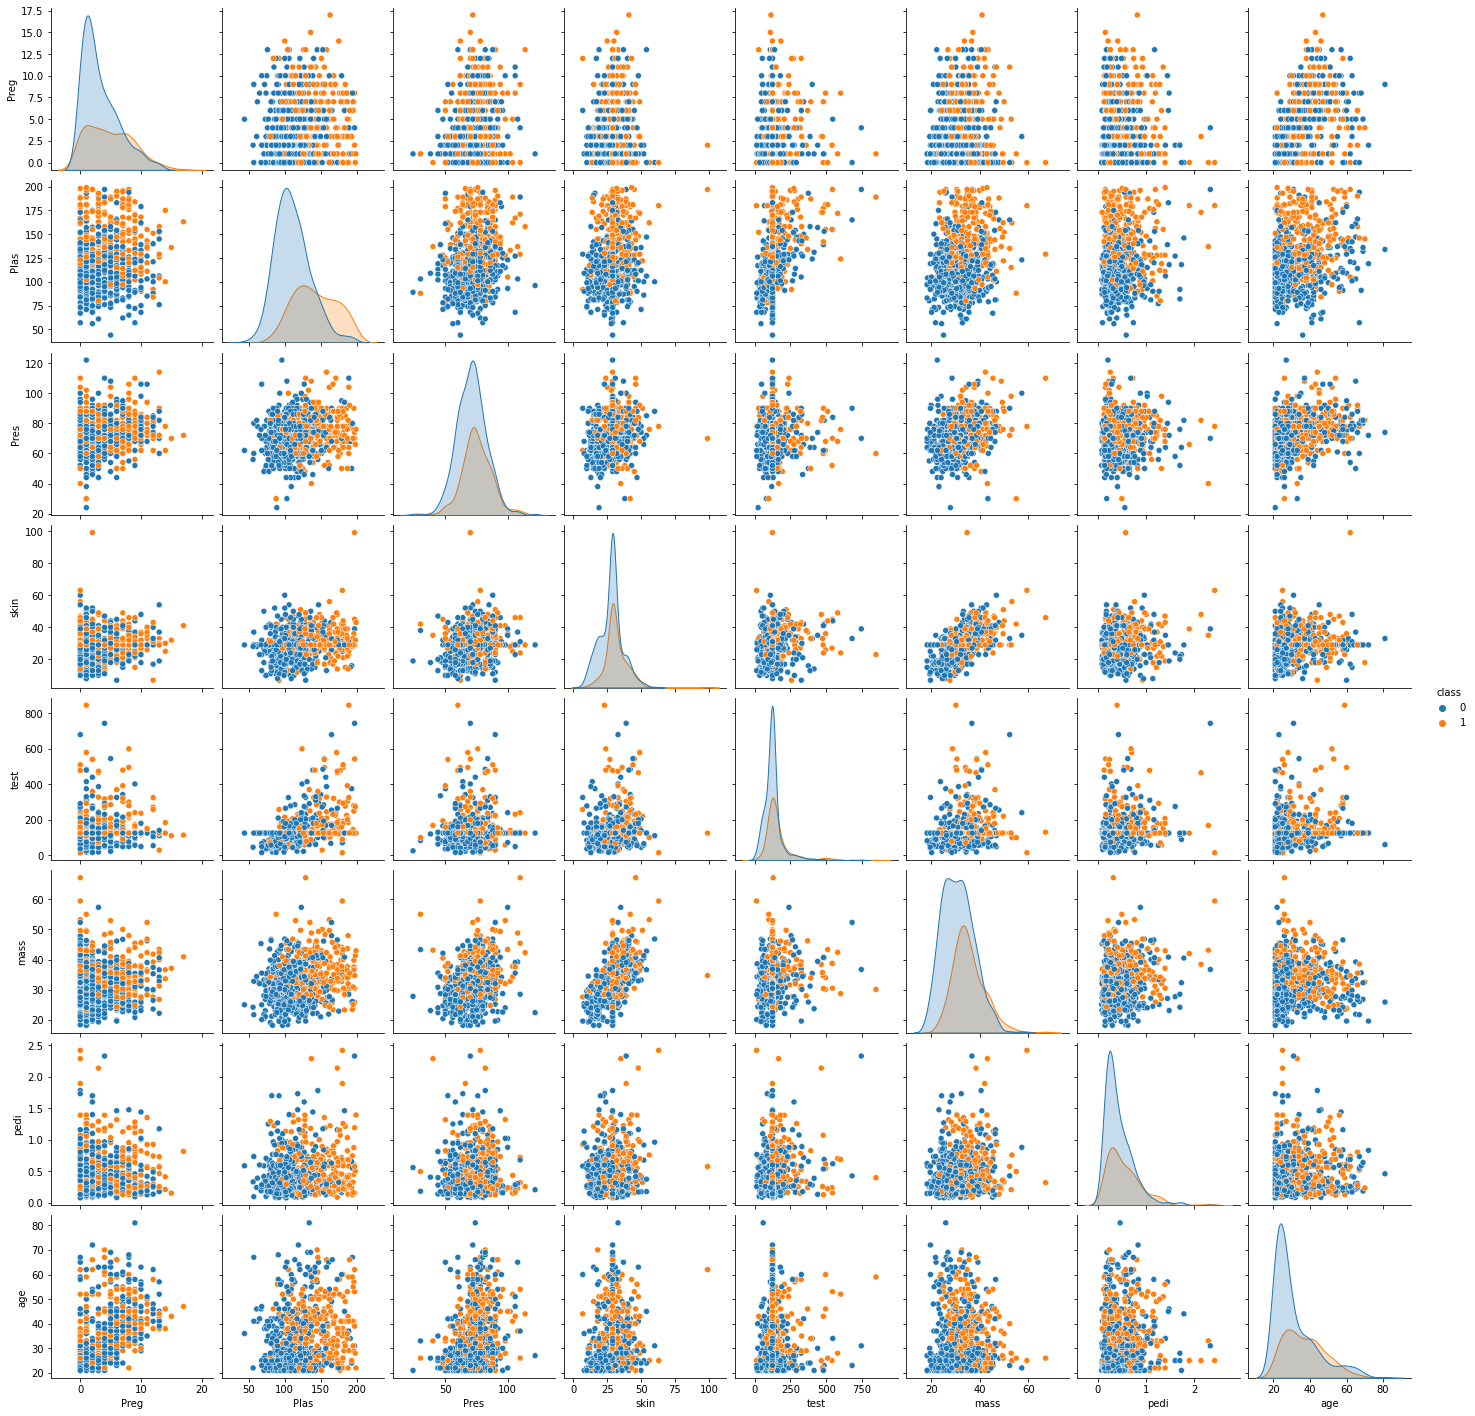

In [ ]:
sns.pairplot(pdata_copy, hue = 'class')

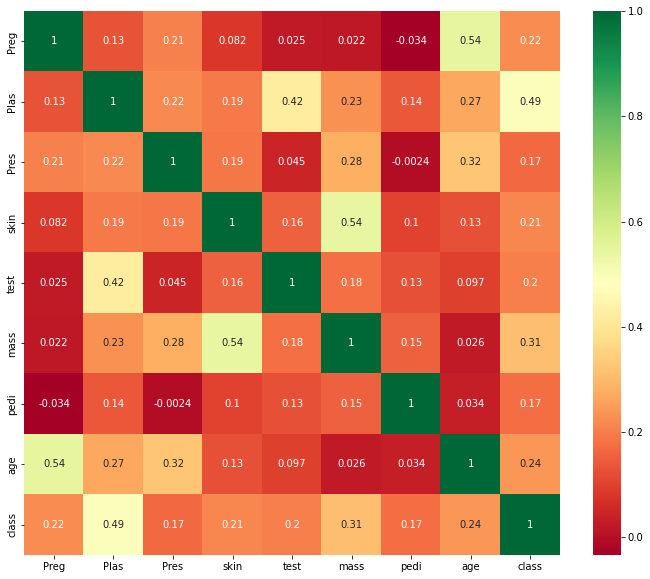

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(pdata_copy.corr(), annot=True,cmap ='RdYlGn') 

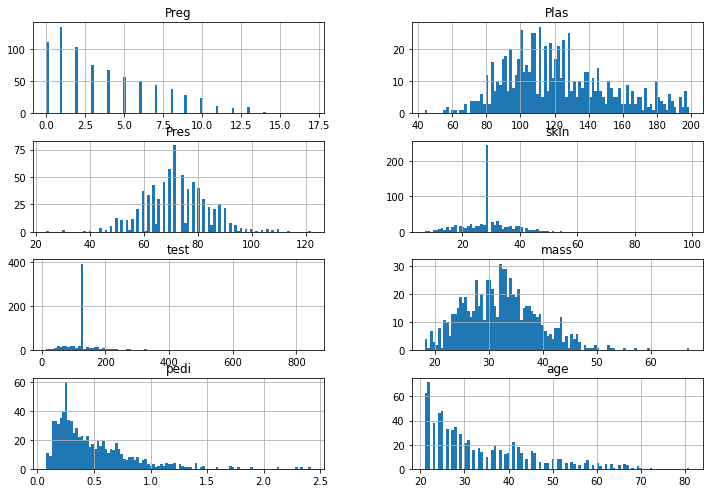

In [ ]:
columns = list(pdata)[0:-1] # Excluding Outcome column 
pdata_copy[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

## Identify Correlation in data 

In [ ]:
pdata_copy.corr() # It will show correlation matrix 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
test,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
mass,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedi,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [ ]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

## Calculate diabetes ratio of True/False from outcome variable 

In [ ]:
n_true = len(pdata_copy.loc[pdata_copy['class'] == True])
n_false = len(pdata_copy.loc[pdata_copy['class'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes. 

Its a good distribution True/False cases of diabetes in data.

## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = pdata_copy.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = pdata_copy['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43
467,0,97.0,64.0,36.0,100.0,36.8,0.600,25
550,1,116.0,70.0,28.0,125.0,27.4,0.204,21
147,2,106.0,64.0,35.0,119.0,30.5,1.400,34
481,0,123.0,88.0,37.0,125.0,35.2,0.197,29


Lets check split of data

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata_copy.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata_copy.index)) * 100))

69.92% data is in training set
30.08% data is in test set


Now lets check diabetes True/False ratio in split data 

In [ ]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(pdata_copy.loc[pdata['class'] == 1]), (len(pdata_copy.loc[pdata['class'] == 1])/len(pdata_copy.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(pdata_copy.loc[pdata['class'] == 0]), (len(pdata_copy.loc[pdata['class'] == 0])/len(pdata_copy.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 183 (34.08%)
Training Diabetes False Values   : 354 (65.92%)

Test Diabetes True Values        : 85 (36.80%)
Test Diabetes False Values       : 146 (63.20%)



# Logistic Regression

In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

         0         1         2  ...         6         7  intercept
0  0.09358  0.026719 -0.027965  ...  0.350888  0.013271  -4.956209

[1 rows x 9 columns]


In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7792207792207793


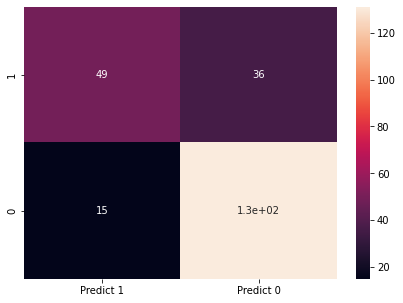

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_predict, average='macro'))
print(f1_score(y_test, y_predict, average='micro'))
print(f1_score(y_test, y_predict, average='weighted'))


0.7473894118403843
0.7792207792207793
0.7710688436721416


The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 49

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 15 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 36 Falsely predict negative Type II error